In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , roc_curve, roc_auc_score

In [2]:
heart_df = pd.read_csv('../input/heart-disease-uci/heart.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_df.describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.95, 1])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
85%,64.000000,1.000000,2.000000,150.000000,298.700000,0.000000,1.000000,173.000000,1.000000,2.200000,2.000000,2.000000,3.000000,1.000000
95%,68.000000,1.000000,3.000000,160.000000,326.900000,1.000000,1.000000,181.900000,1.000000,3.400000,2.000000,3.000000,3.000000,1.000000
100%,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


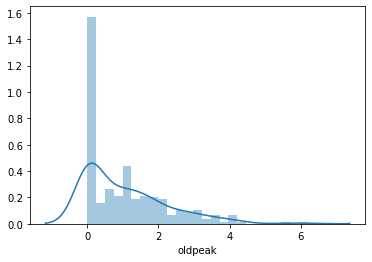

In [5]:
sns.distplot(heart_df['oldpeak'], bins=25)
plt.show()

In [6]:
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [7]:
sc = StandardScaler()
X = pd.DataFrame(data=sc.fit_transform(X), columns=X.columns)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# **ML Model**

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [10]:
confusion_matrix(y_test, y_pred)

array([[32,  9],
       [ 8, 42]])

In [11]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(32, 9, 8, 42)

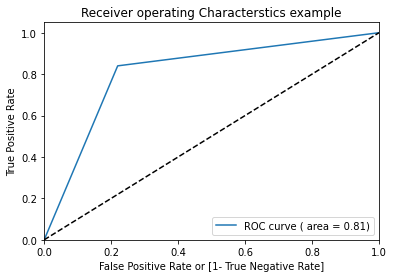

(array([0.       , 0.2195122, 1.       ]),
 array([0.  , 0.84, 1.  ]),
 array([2, 1, 0]))

In [12]:
def draw_roc(actual , probs):
  fpr,tpr,thresholds = roc_curve(actual, probs, drop_intermediate=False)

  auc_score = roc_auc_score(actual, probs)
  plt.figure(figsize=(6,4))
  plt.plot(fpr,tpr, label='ROC curve ( area = %0.2f)'% auc_score)
  plt.plot([0,1],[0,1],'k--')

  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  plt.xlabel('False Positive Rate or [1- True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating Characterstics example')
  plt.legend(loc='lower right')
  plt.show()

  return fpr ,tpr , thresholds

draw_roc(y_test, y_pred)  